# Exercise 5: Variance reduction methods

In [2]:
import scipy.stats as stats
from src.my_random import gen
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import random


def func(x):
    return np.exp(x)

1.

In [5]:
N = 100
runs = 10000
areas = []

for i in range(runs):
    xrand = stats.uniform.rvs(size=N)
    areas.append(np.mean(func(xrand)))

m = np.mean(areas)
s = np.std(areas)
dof = N-1
conf = 0.95

t = np.abs(stats.t.ppf((1-conf)/2,dof))
confInt = (m-s*t/np.sqrt(N),m+s*t/np.sqrt(N))
print('The point estimate of the crude Monte Carlo estimator is: ',m)
print('While the confidence interval at 95%','confidence is:',confInt)


The point estimate of the crude Monte Carlo estimator is:  1.7184951278504745
While the confidence interval at 95% confidence is: (1.7088397692667987, 1.7281504864341504)


(array([1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 1.700e+01, 2.100e+01,
        7.000e+01, 1.180e+02, 2.180e+02, 3.590e+02, 4.740e+02, 7.170e+02,
        8.620e+02, 9.400e+02, 1.097e+03, 1.028e+03, 1.045e+03, 9.040e+02,
        7.240e+02, 5.040e+02, 3.890e+02, 2.310e+02, 1.170e+02, 8.800e+01,
        4.500e+01, 9.000e+00, 1.100e+01, 6.000e+00, 0.000e+00, 1.000e+00]),
 array([1.51519593, 1.52865357, 1.54211121, 1.55556886, 1.5690265 ,
        1.58248414, 1.59594179, 1.60939943, 1.62285707, 1.63631471,
        1.64977236, 1.66323   , 1.67668764, 1.69014528, 1.70360293,
        1.71706057, 1.73051821, 1.74397586, 1.7574335 , 1.77089114,
        1.78434878, 1.79780643, 1.81126407, 1.82472171, 1.83817935,
        1.851637  , 1.86509464, 1.87855228, 1.89200992, 1.90546757,
        1.91892521]),
 <BarContainer object of 30 artists>)

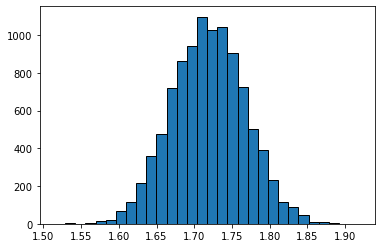

In [6]:
plt.hist(areas, bins=30, ec= 'black')

2.

The point estimate of the antithetic Monte Carlo estimator is:  1.7183870169627176
While the confidence interval at 95%  confidence is: (1.7171250095735278, 1.7196490243519074)


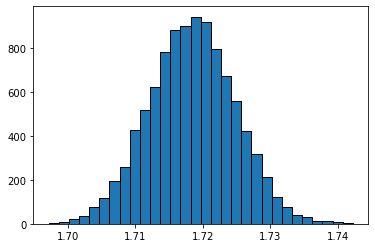

In [7]:
N = 100
runs = 10000
areas = []


for i in range(runs):
    urand = stats.uniform.rvs(size=N)
    areas.append(np.mean((func(urand)+func(1)/func(urand))/2))

m = np.mean(areas)
s = np.std(areas)
dof = N-1
conf = 0.95

t = np.abs(stats.t.ppf((1-conf)/2,dof))
confInt = (m-s*t/np.sqrt(N),m+s*t/np.sqrt(N))
print('The point estimate of the antithetic Monte Carlo estimator is: ',m)
print('While the confidence interval at 95%',' confidence is:',confInt)

plt.hist(areas, bins=30, ec= 'black');

3.

The point estimate of the Monte Carlo estimator using a control variable is:  171.77332159896093
While the confidence interval at 95% confidence is: (170.80038872057546, 172.7462544773464)


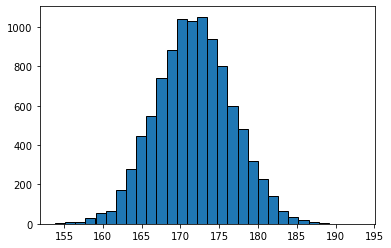

In [8]:
N = 100
runs = 10000
areas = []

for i in range(runs):
    urand = stats.uniform.rvs(size=N)
    X = np.zeros(N)
    mu = 0.5
    #c = -(np.mean(urand*func(urand))-np.mean(urand)*np.mean(func(urand)))/np.var(urand)
    c = 0.0039
    areas.append(np.mean(np.sum(func(urand) + c*(urand-mu))))

    
m = np.mean(areas)
s = np.std(areas)
dof = N-1
conf = 0.95

t = np.abs(stats.t.ppf((1-conf)/2,dof))
confInt = (m-s*t/np.sqrt(N),m+s*t/np.sqrt(N))
print('The point estimate of the Monte Carlo estimator using a control variable is: ',m)
print('While the confidence interval at 95%','confidence is:',confInt)

plt.hist(areas, bins=30, ec= 'black');

4.

The point estimate of the Monte Carlo estimator using stratified sampling is:  1.718306774712098
While the confidence interval at 95% confidence is: (1.717984834463152, 1.7186287149610437)


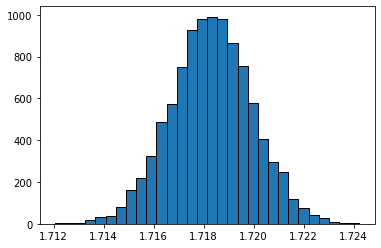

In [9]:
a=0
b=1
N = 100
strata = 10
runs = 10000
areas = []

for i in range(runs):
    urand = np.zeros((N,strata))
    for i in range(N):
        for j in range(strata):
            urand[i][j] = random.uniform(a,b)
    W = 0.0
    for i in range(N):
        for j in range(strata):
            W += func((urand[i][j]+j)/strata)/strata
    
    areas.append(W/float(N))

m = np.mean(areas)
s = np.std(areas)
dof = N-1
conf = 0.95
t = np.abs(stats.t.ppf((1-conf)/2,dof))
confInt = (m-s*t/np.sqrt(N),m+s*t/np.sqrt(N))
print('The point estimate of the Monte Carlo estimator using stratified sampling is: ',m)
print('While the confidence interval at 95%','confidence is:',confInt)
plt.hist(areas, bins=30, ec= 'black');

5.

In [10]:
from src.my_random.eventBis import BlockingEventSimulation, calculate_theoretical_block_pct
from dataclasses import dataclass

In [11]:

arr_dist = stats.expon()

serv_dist = stats.expon(scale=8)
pois_sim = BlockingEventSimulation(arr_dist, serv_dist)
blocked = []
for i in range(10):
    blocked.append(pois_sim.simulate(10_000, 10))

In [12]:
mean = np.mean(blocked)
sd = np.std(blocked)
lwr, upr = stats.t.interval(0.95, 9)
conf = [mean + sd/np.sqrt(10)*lwr, mean + sd/np.sqrt(10)*upr]

mean, conf

(0.12365000000000001, [0.11969863238092829, 0.12760136761907173])

In [13]:
np.random.seed(seed=233423)
urand = stats.uniform.rvs(size=1000)
xrand = func(urand)
np.random.seed(seed=233423)
arr_times = stats.expon.rvs(size=1000)
exponE = arr_times.mean()
exponVar = arr_times.var()
uniE = xrand.mean()
uniVar = xrand.var()

print('Exponential dist E:',exponE,'and Var:',exponVar)
print('Unif dist into exponential E:',exponE,'and Var:',exponVar)

Exponential dist E: 0.9364349670734267 and Var: 0.8834338902973959
Unif dist into exponential E: 0.9364349670734267 and Var: 0.8834338902973959


In [14]:
calculate_theoretical_block_pct(10, 8)

0.12166106425295149

6.

Reusing the same random seed we compare the prior results with hyperexponential interarrival times:

In [15]:
@dataclass
class hyper_exp:
    p1: float
    p2: float
    lmbda1: float
    lmbda2: float

    def rvs(self, size):
        np.random.seed(seed=233423)
        return self.p1 * stats.expon.rvs(size=size, scale=1/self.lmbda1) \
            + self.p2*stats.expon.rvs(size=size, scale = 1/self.lmbda2)

In [16]:
arr_erl = stats.erlang(a=1)
arr_hyp = hyper_exp(0.8, .2, .8333, 5.0)
serv_dist = stats.expon(scale=8)

sim_erl = BlockingEventSimulation(arr_erl, serv_dist)
sim_hyp = BlockingEventSimulation(arr_hyp, serv_dist)

In [17]:
blocked = []
for i in range(10):
    blocked.append(sim_erl.simulate(10_000, 10))

mean = np.mean(blocked)
sd = np.std(blocked)
lwr, upr = stats.t.interval(0.95, 9)
conf = [mean + sd/np.sqrt(10)*lwr, mean + sd/np.sqrt(10)*upr]

mean, conf

(0.11943999999999999, [0.11327403842485124, 0.12560596157514872])

7.

The point estimate of the crude Monte Carlo estimator is:  1.6491895840812825
While the confidence interval at 95% confidence is: (1.6062798655044943, 1.6920993026580706) also this here 0.04290971857678806


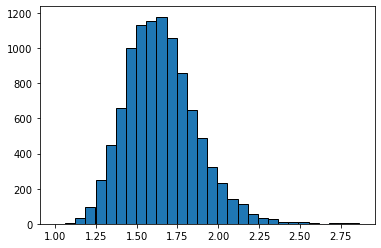

In [18]:
min = 0
max = 1
sig2 = 1
N = 100
runs = 10000
areas = []
np.random.seed()

for _ in range(runs):
    xrand = stats.norm.rvs(size=N)
    areas.append(np.mean(func(xrand)))

m = np.mean(areas)
s = np.std(areas)
dof = N-1
conf = 0.95

t = np.abs(stats.t.ppf((1-conf)/2,dof))
confInt = (m-s*t/np.sqrt(N),m+s*t/np.sqrt(N))
print('The point estimate of the crude Monte Carlo estimator is: ',m)
print('While the confidence interval at 95%','confidence is:',confInt,'also this here',s*t/np.sqrt(N))

plt.hist(areas, bins=30, ec= 'black');

The point estimate of the crude Monte Carlo estimator is:  1.6540128907368432
While the confidence interval at 95% confidence is: (1.6105138397424097, 1.6975119417312767) with a = 0
The point estimate of the crude Monte Carlo estimator is:  12.195267984674688
While the confidence interval at 95% confidence is: (11.881315323123935, 12.50922064622544) with a = 2
The point estimate of the crude Monte Carlo estimator is:  292474.0311515448
While the confidence interval at 95% confidence is: (-36431.78996874974, 621379.8522718394) with a = 4


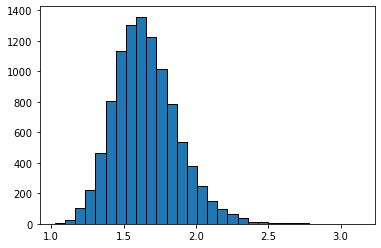

In [19]:
min = 0
max = 1
a = (0,2,4)
sig2 = 1
N = 100
runs = 10000
areas = np.zeros((len(a),runs))
np.random.seed()

for k in range(len(a)):
    for i in range(runs):
        xrand = stats.norm.rvs(size=N)
        frand = stats.norm.pdf(xrand)
        grand = stats.norm.pdf(xrand,loc=a[k],scale=1)
        integral = 0.0
        for j in range(N):
            integral += np.exp(xrand[j])*frand[j]/grand[j]
        areas[k][i]=(integral/float(N))*(max-min)
    m = np.mean(areas[k])
    s = np.std(areas[k])
    dof = N-1
    conf = 0.95
    t = np.abs(stats.t.ppf((1-conf)/2,dof))
    confInt = (m-s*t/np.sqrt(N),m+s*t/np.sqrt(N))
    print('The point estimate of the crude Monte Carlo estimator is: ',m)
    print('While the confidence interval at 95%','confidence is:',confInt,'with a =',a[k])


plt.hist(areas[0], bins=30, ec= 'black');

8.

The point estimate of the crude Monte Carlo estimator is:  1.7213303785319012
While the confidence interval at 95% confidence is: (1.7182141724276476, 1.7244465846361547)


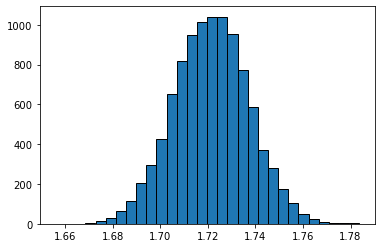

In [20]:
min = 0
max = 1
sig2 = 1
N = 100
runs = 10000
areas = []
lamb = -0.6835
np.random.seed()

for _ in range(runs):
    xrand = stats.uniform.rvs(size=N)
    frand = stats.uniform.pdf(xrand)
    grand = lamb*np.exp(-lamb*xrand)
    areas.append(np.abs(np.mean(np.exp(xrand)*frand/(grand))))

m = np.mean(areas)
s = np.std(areas)
dof = N-1
conf = 0.95



t = np.abs(stats.t.ppf((1-conf)/2,dof))
confInt = (m-s*t/np.sqrt(N),m+s*t/np.sqrt(N))
print('The point estimate of the crude Monte Carlo estimator is: ',m)
print('While the confidence interval at 95%','confidence is:',confInt)

plt.hist(areas, bins=30, ec= 'black');

9.
For the pareto case, using the First moment distribution of the pareto as sampling distribution, we derive the expected mean of the IS estimator to be equal to the theoretical mean. Should one know the first moment distribution of a distribution one is attempting to approximate, implementing the first moment as a sampling distribution would in theory make sense should the expected value be unknown and more difficult to compute.

$$\frac{x\frac{k\beta^k}{x^{k+1}}}{\frac{(k-1)\beta^{k-1}}{x^k}}=\frac{k}{k-1}\beta$$